<a href="https://colab.research.google.com/github/HakanAknc/BTK_JS_Lessons/blob/main/Naive_Bayes_%C4%B0le_TitanicVeriAnalizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Kütüphanelerin eklenmesi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# verinin import edilmesi
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# ilk 5 veri
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Sütün satır sayısı
train_data.shape

(891, 12)

In [ ]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Veri çerçevesi oluşturma

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Veri setinin kolonları
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Veri sütunlarının özelliklerinin görüntülenmesi

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Kaç tane eksik veri var?
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# kategorik değişkenin frekans tablosunun çizdirilmesi

def degiskenler(variable):
  cat=train_data[variable]
  sayi=cat.value_counts()
  plt.figure(figsize=(5,5))
  plt.bar(sayi.index,sayi)
  plt.xticks(sayi.index,sayi.index.values)
  plt.ylabel("frakeans")
  plt.title(variable)
  plt.show()
  print(variable,sayi)

In [ ]:
category1=["Survived","Sex","Pclass","Embarked","SibSp","Parch"]

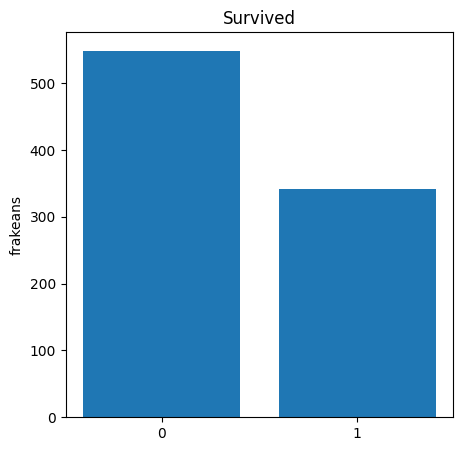

Survived 0    549
1    342
Name: Survived, dtype: int64


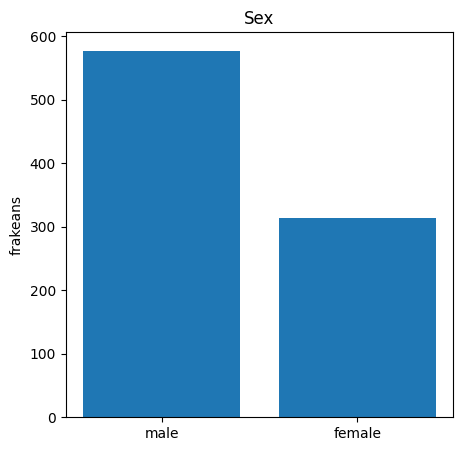

Sex male      577
female    314
Name: Sex, dtype: int64


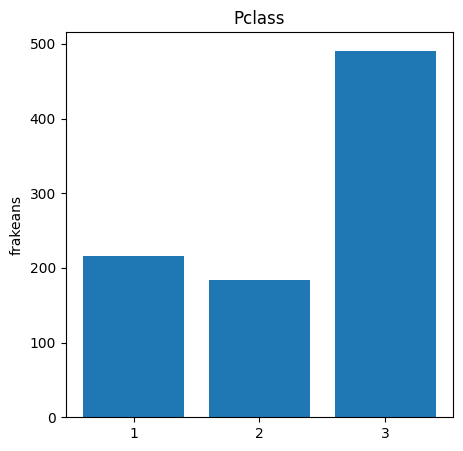

Pclass 3    491
1    216
2    184
Name: Pclass, dtype: int64


In [ ]:
for i in category1:
  if i in train_data.columns:
    degiskenler(i)

In [ ]:
category2=["Cabin","Name","Ticket"]

In [ ]:
for i in category2:
  print(train_data[i].value_counts())

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


In [ ]:
# Kaç tane eksik veri var?
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

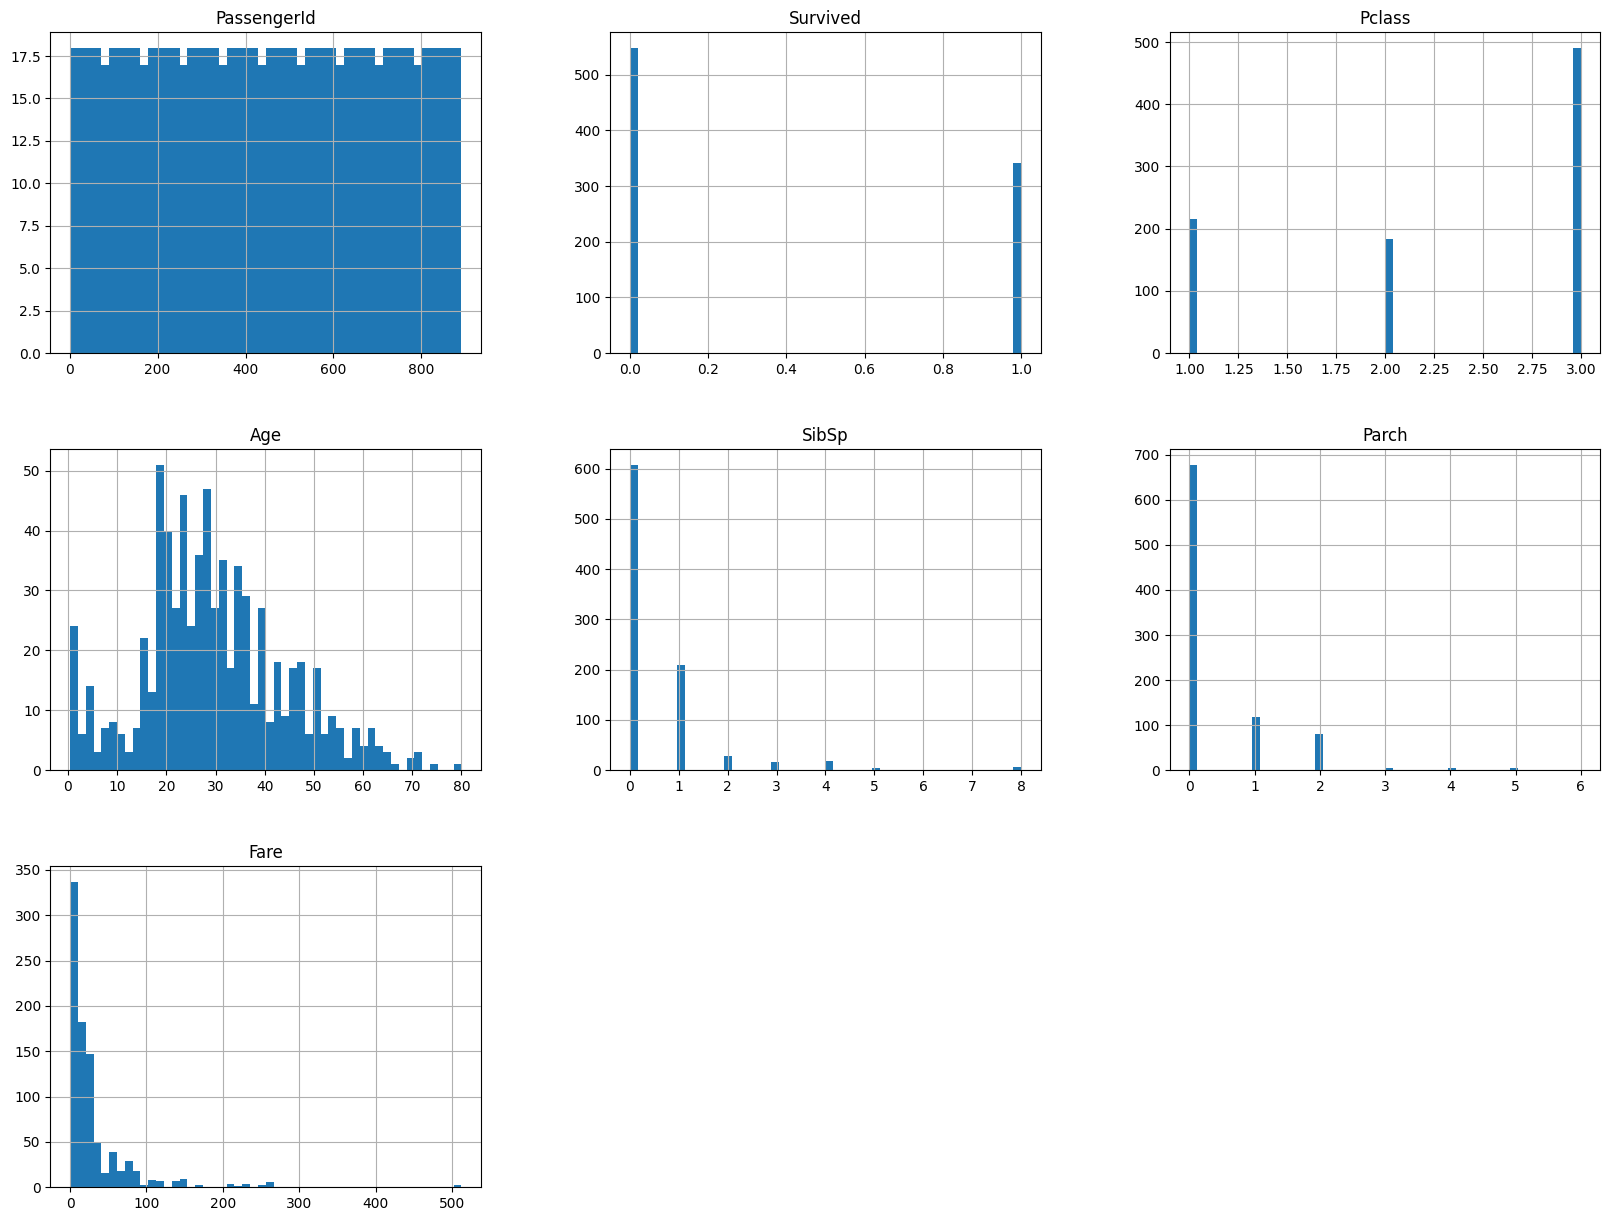

In [ ]:
#histogram grafikleri
train_data.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
def hist(variable):
  plt.figure(figsize=(9,3))
  plt.hist(train_data[variable])
  plt.xlabel(variable)
  plt.ylabel("frekans")
  plt.title(variable)
  plt.show()

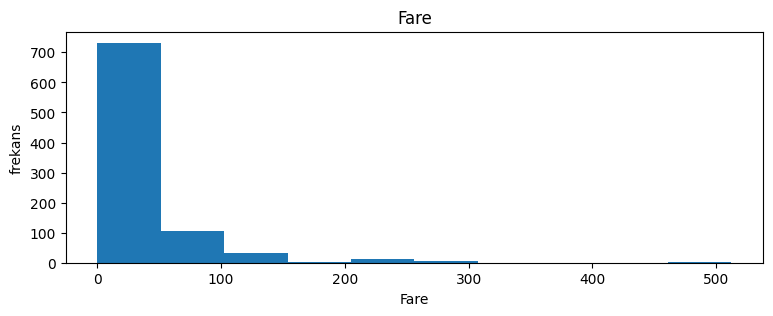

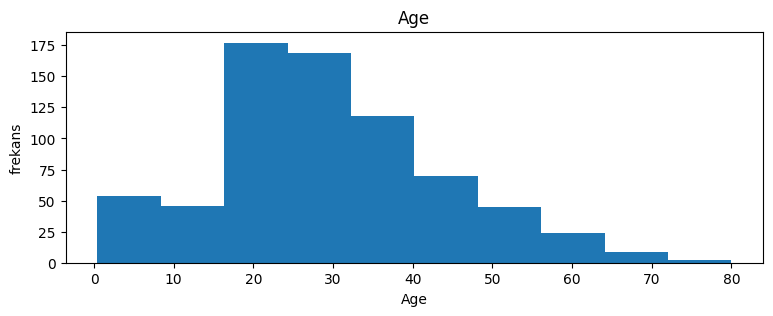

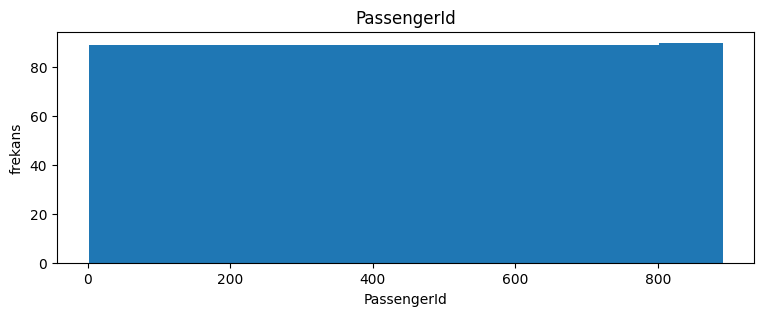

In [ ]:
sayisal=["Fare","Age","PassengerId"]
for i in sayisal:
  hist(i)

In [ ]:
train_data[["Pclass","Survived"]]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [ ]:
train_data[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_data[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=True)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [ ]:
train_data[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=True)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [ ]:
train_data[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=True)

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


In [ ]:
train_data[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
train_data_len=len(train_data)

In [ ]:
train_data1=pd.concat([train_data, test_data],axis=0).reset_index(drop=True)

In [ ]:
train_data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train_data1.columns[train_data1.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
train_data1.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
train_data1[train_data1["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<Axes: title={'center': 'Fare'}, xlabel='Embarked'>

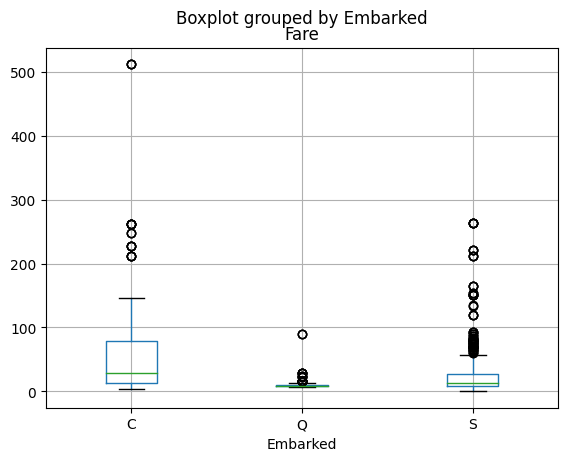

In [ ]:
train_data1.boxplot(column="Fare",by="Embarked")

In [ ]:
train_data1["Embarked"]=train_data1["Embarked"].fillna("c")

In [ ]:
train_data1[train_data1["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


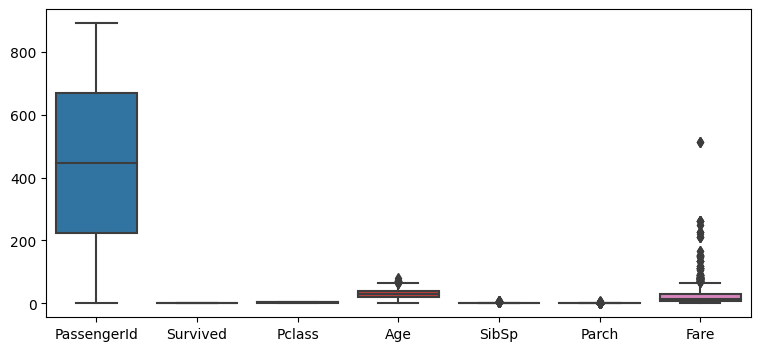

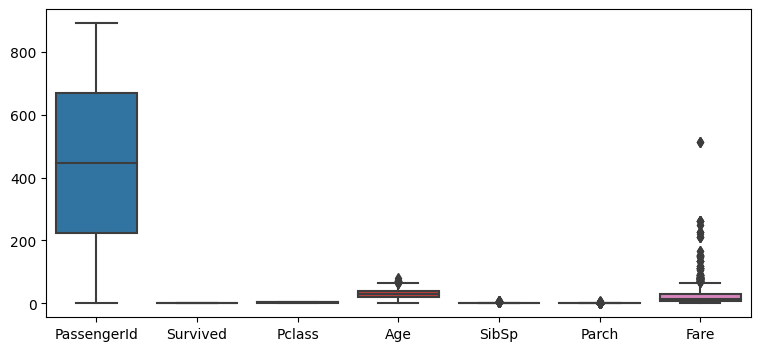

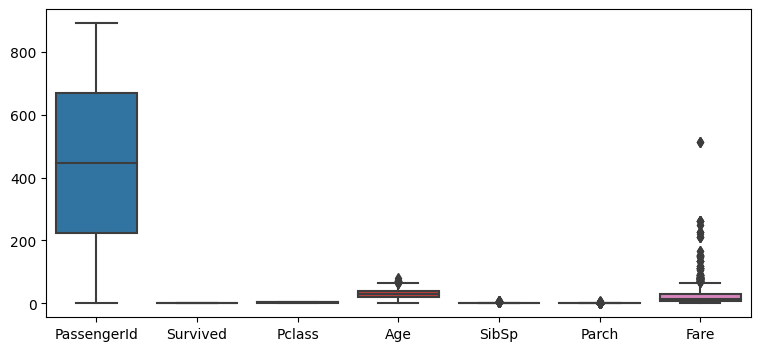

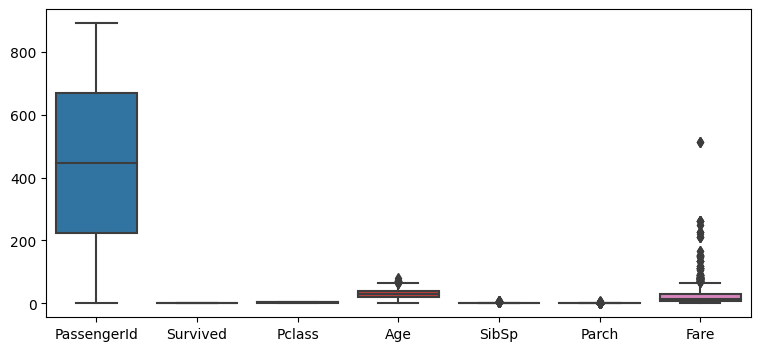

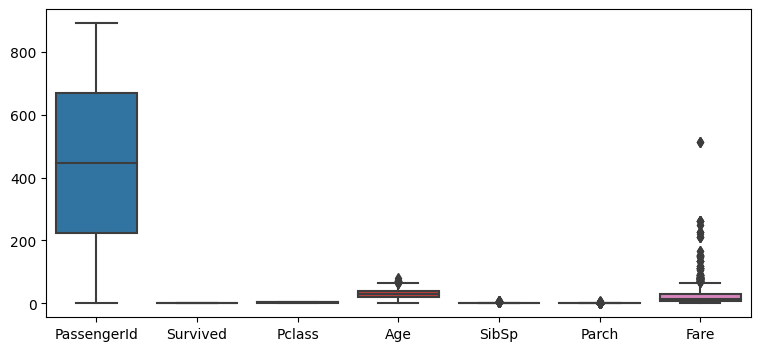

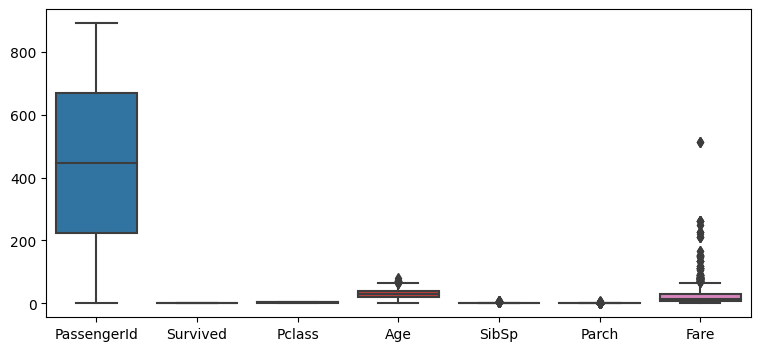

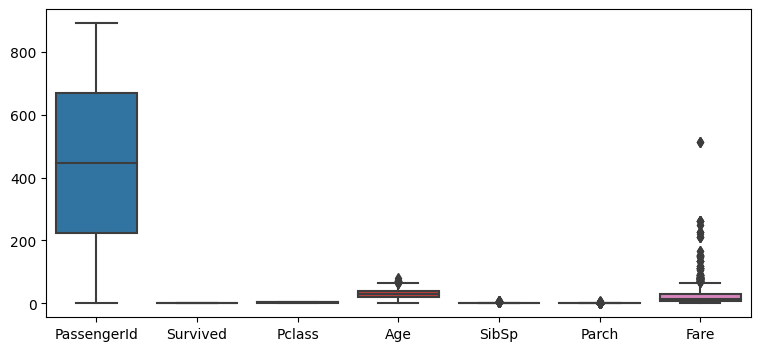

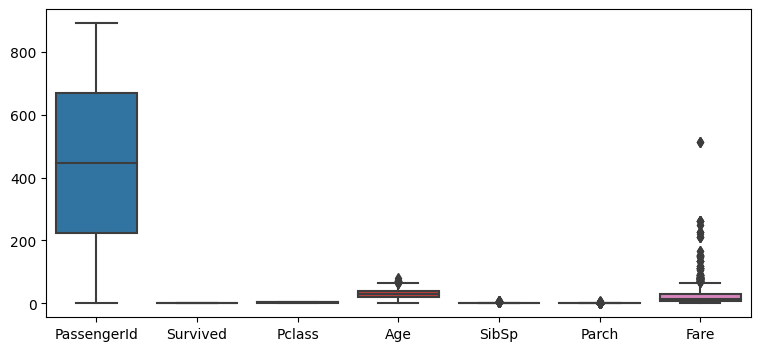

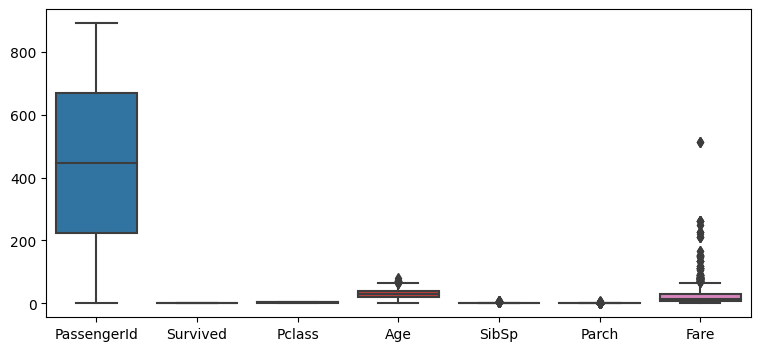

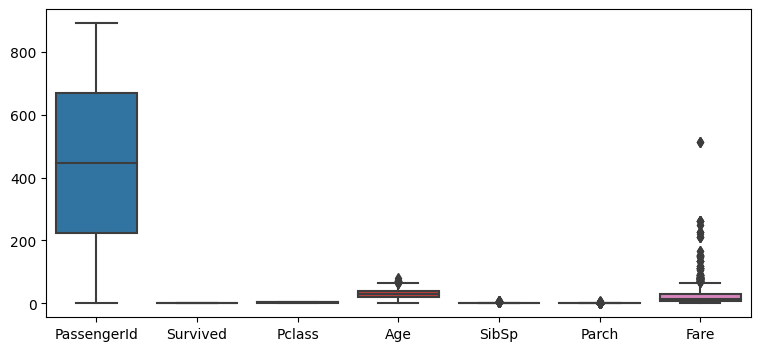

In [ ]:
## sütunların numaratik grafiksel gösterimi
Numerical = ['PassengerId', 'Survived', 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Ticket', 'Fare']
i = 0
while i <10:
  fig = plt.figure(figsize =[20,4])
  plt.subplot(1,2,1) #(one row, two plots, firs one)
  sns.boxplot(data = train_data[Numerical] )
  i+=1

<ipython-input-35-4756b2de01ae>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


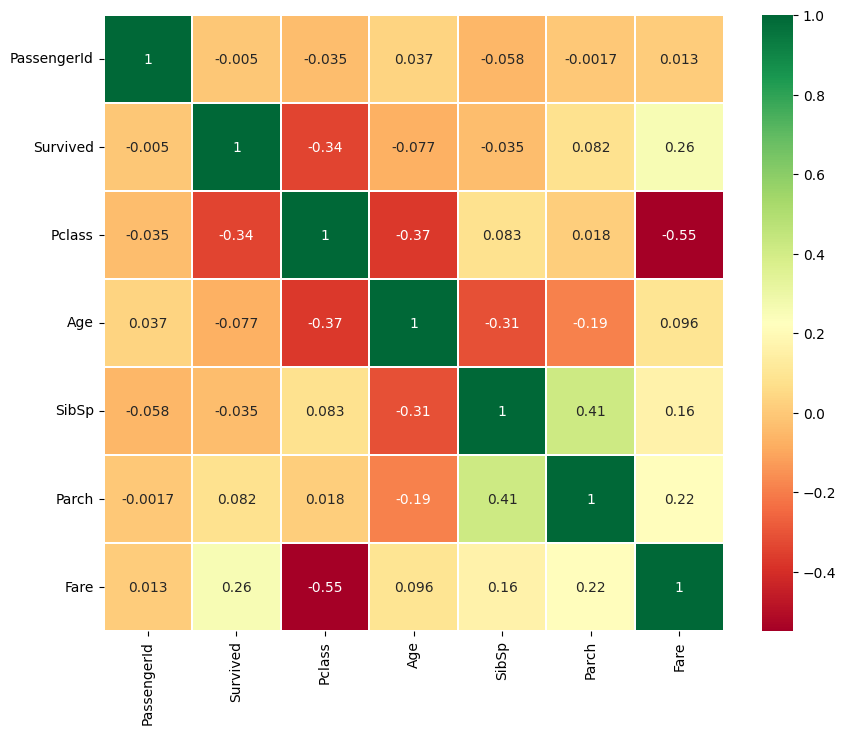

In [ ]:
## Korelasyon ısı haritası gösterimi

sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [ ]:
#korelasyon tablosu
train_data.corr()

<ipython-input-36-94df0aaaa425>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
# Korelasyon hakkında genel bilgilindirme

train_data.corr()['Pclass'].sort_values(ascending=False)

<ipython-input-37-b7633c58e599>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()['Pclass'].sort_values(ascending=False)


Pclass         1.000000
SibSp          0.083081
Parch          0.018443
PassengerId   -0.035144
Survived      -0.338481
Age           -0.369226
Fare          -0.549500
Name: Pclass, dtype: float64

<Axes: xlabel='Sex'>

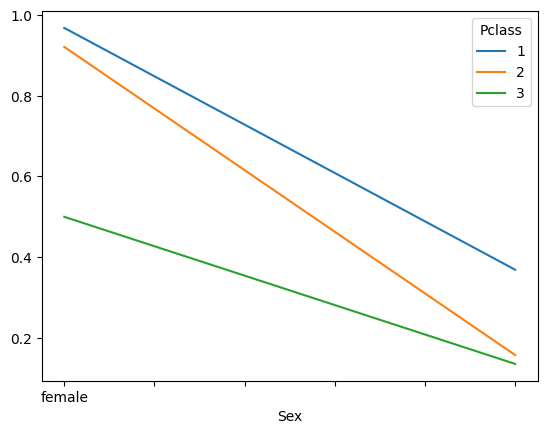

In [ ]:
# Cinsiyet ve Sınıfa göre hayatta kalma oranı

train_data.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot()


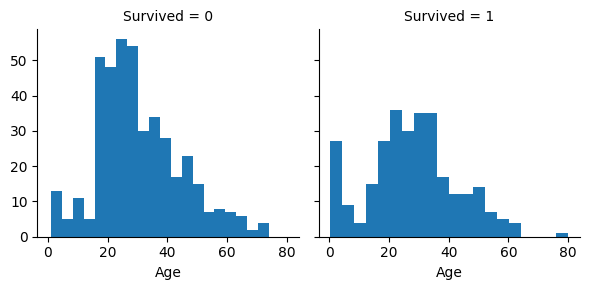

In [ ]:
# Yaşlara göre hayatta kalma oranları

SurvAge = sns.FacetGrid(train_data, col="Survived")
SurvAge.map(plt.hist, 'Age', bins=20)

<Axes: xlabel='Pclass', ylabel='Survived'>

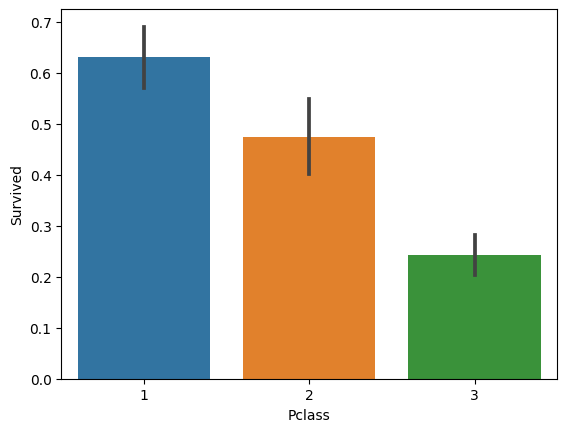

In [ ]:
# Yolcuların sınıflarına göre hayatta kalma oranları

sns.barplot(x = 'Pclass', y = 'Survived', data = train_data)

<Axes: xlabel='Pclass', ylabel='Age'>

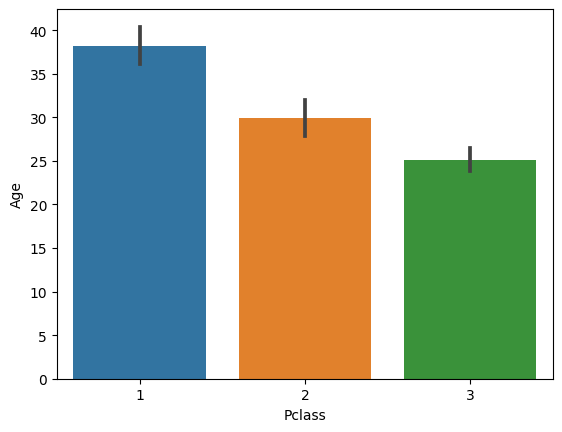

In [ ]:
sns.barplot(x = 'Pclass', y = 'Age', data = train_data)

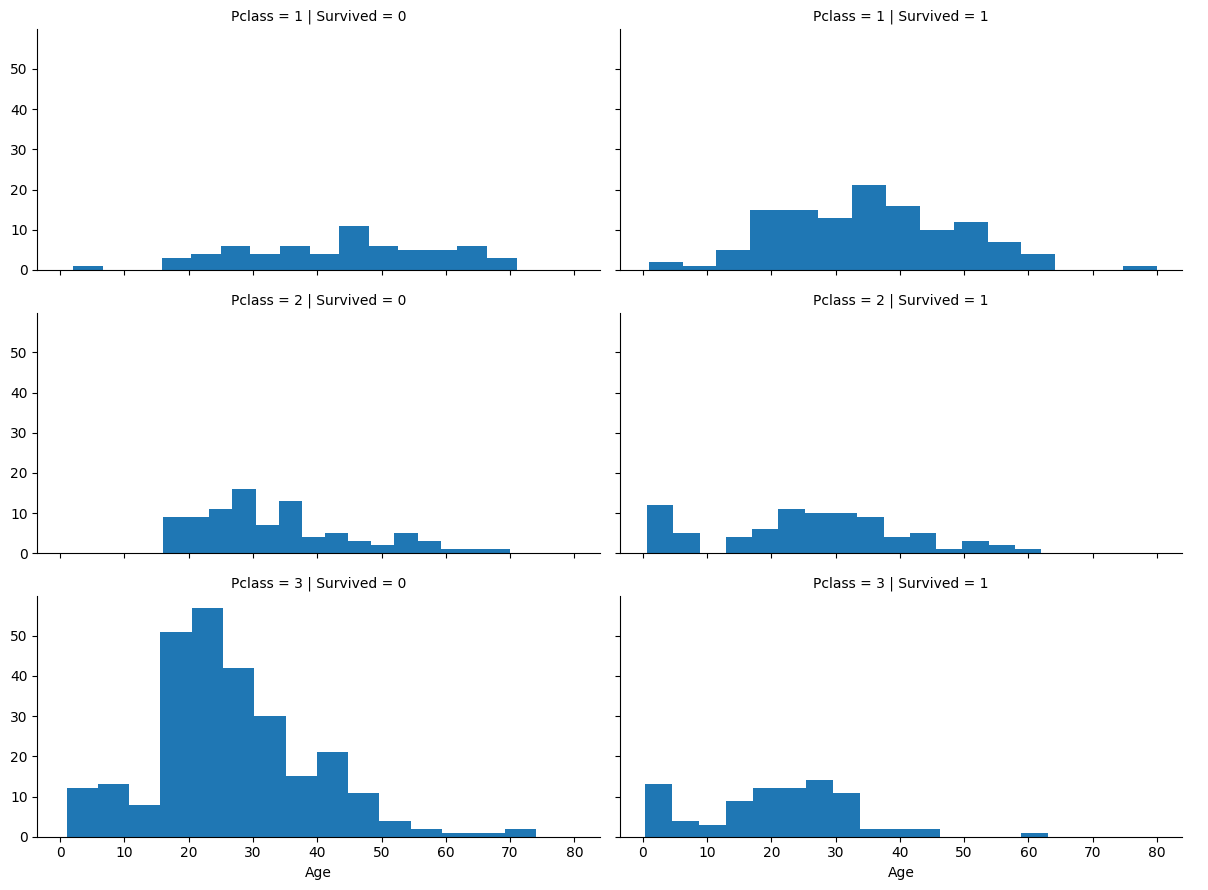

In [ ]:
# Yolcuların yaş ve sınıflarına göre hayatta kalma durumları
# histogram grafiği

spca = sns.FacetGrid(train_data, col='Survived', row='Pclass', aspect=2)
spca.map(plt.hist, 'Age', alpha=1, bins=15)
spca.add_legend();

<Axes: >

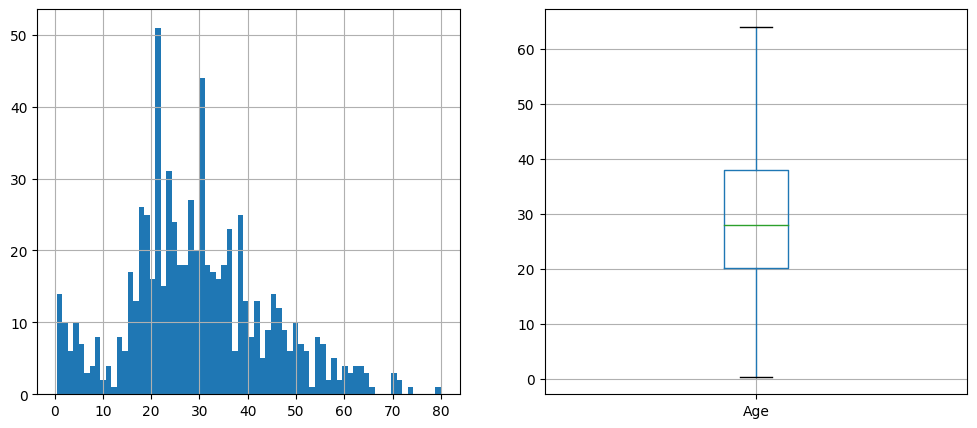

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Age'].hist(bins=70)

plt.subplot(122)
train_data.boxplot(column='Age', showfliers=False)

<ipython-input-44-0aaec3467a77>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr())


<Axes: >

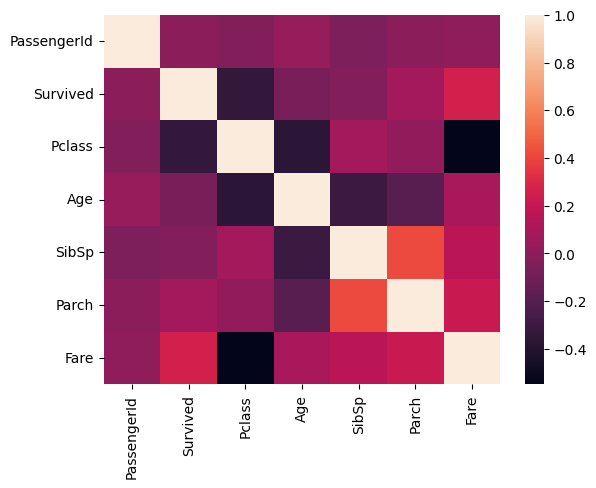

In [ ]:
sns.heatmap(train_data.corr())

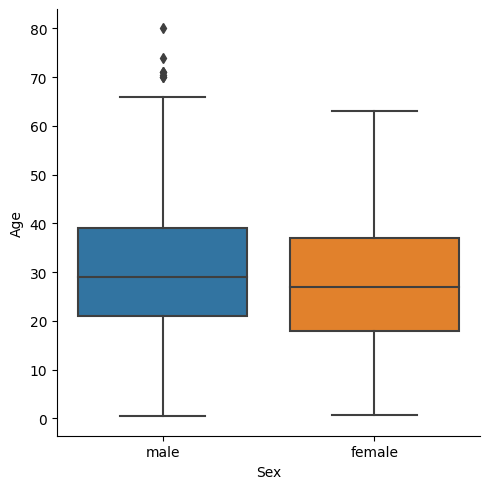

In [ ]:
sns.catplot(x="Sex", y="Age", kind="box", data=train_data)

<Axes: xlabel='Sex', ylabel='Survived'>

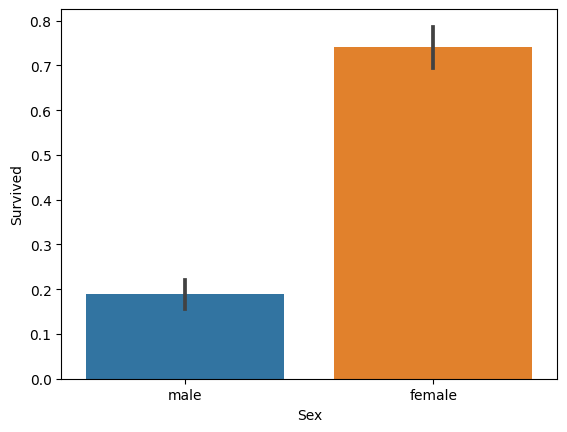

In [ ]:
sns.barplot(x='Sex', y='Survived', data=train_data)

<Axes: xlabel='Embarked', ylabel='Survived'>

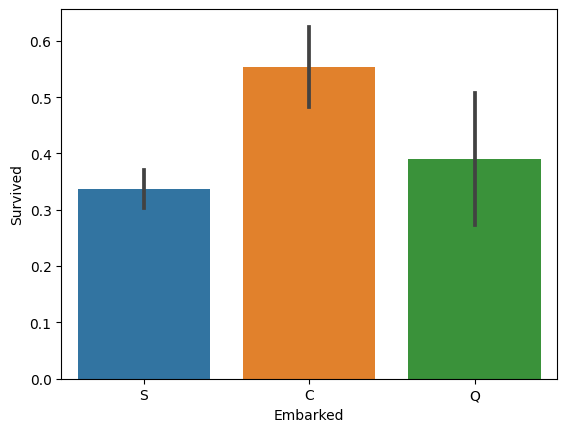

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=train_data)

<Axes: xlabel='Pclass', ylabel='Survived'>

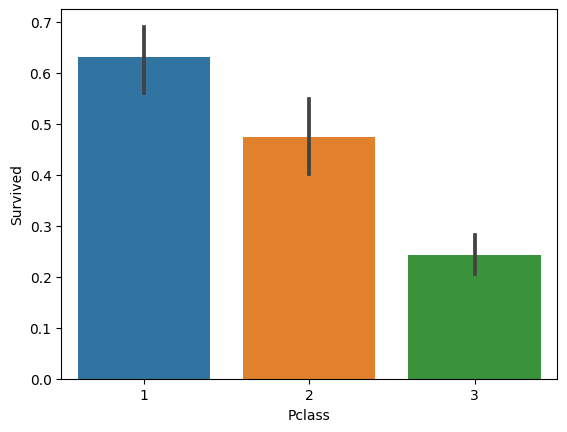

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

<ipython-input-49-58fe1a97d1f6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[feature])


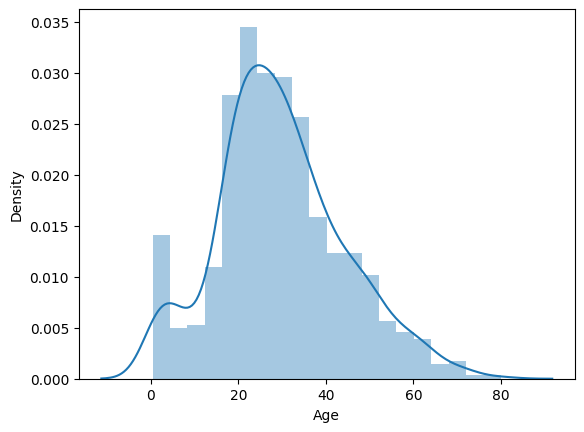

<ipython-input-49-58fe1a97d1f6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[feature])


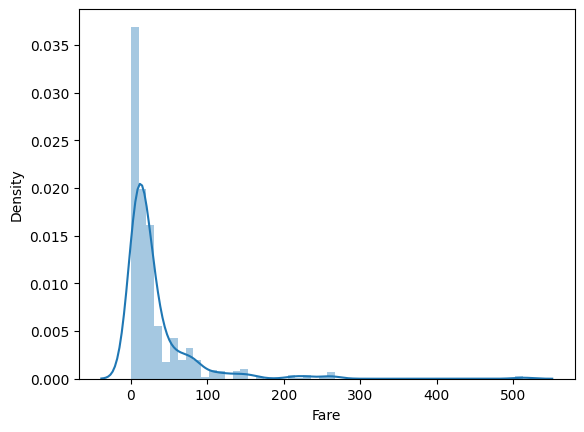

<ipython-input-49-58fe1a97d1f6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[feature])


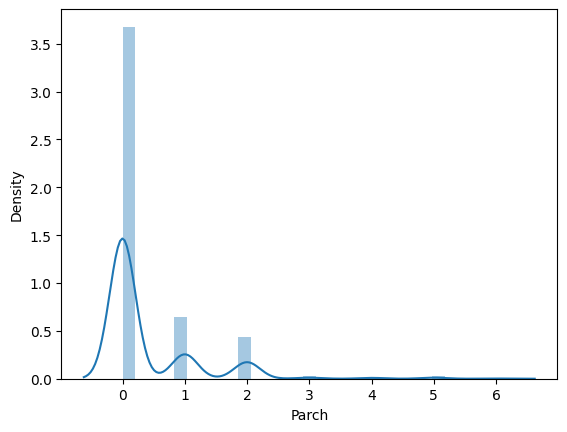

<ipython-input-49-58fe1a97d1f6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[feature])


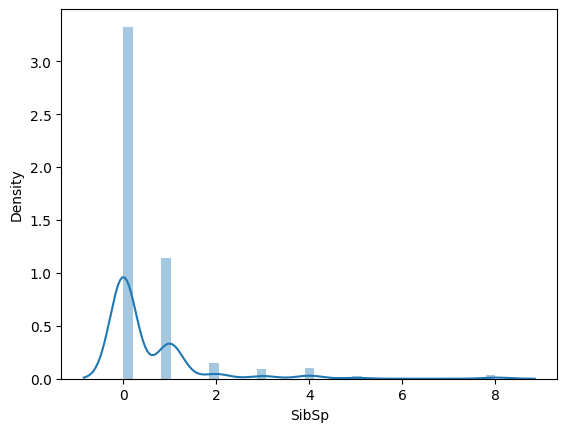

In [ ]:
continuous_numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
for feature in continuous_numeric_features:
    sns.distplot(train_data[feature])
    plt.show()

In [ ]:
train_data = train_data[['Pclass','Sex','Age','Fare','Survived']]  #bu kolonları filitreliyorum datafram'den
train_data   # datafram'ı tekrar güncelliyorum yeni datafram ağaşdaki gibidir

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [ ]:
train_data.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [ ]:
x = train_data.drop('Survived',axis='columns')  # survived kolonunu ayırıyorum
y = train_data.Survived   # buda benim y değişkenlerim bunu da ayırıyorum

In [ ]:
x

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [ ]:
x.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
dummies = pd.get_dummies(x.Sex)   # numpy'ın Noun değerleri var mı kontrol ediliyor.
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
x = pd.concat([x,dummies],axis='columns')   # burda ilgili kolonları bağladık
x.head()  # x değerlerimin son hali

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [ ]:
x = x.drop('Sex',axis='columns')   # artık sex kolonuna ihtiacım yok düşürdük
x.head(10)  # ilk on x verisini getirdi

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
5,3,NaN,8.4583,0,1
6,1,54.0,51.8625,0,1
7,3,2.0,21.0750,0,1
8,3,27.0,11.1333,1,0
9,2,14.0,30.0708,1,0


In [ ]:
x['Age'] = x['Age'].fillna(x['Age'].mean())   # ortalama ile dolduruldu
x.head(10)  # ilk on satırı ortalama değer ile doldurmuş hali

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


In [ ]:
from sklearn.model_selection import train_test_split   # modelimi eğite bilim artık
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)  # veri setini alıyor ve ayrıştırıyoruz.

In [ ]:
len(x_train)

712

In [ ]:
len(x_test)

179

In [ ]:
from sklearn.naive_bayes import GaussianNB  # sklearn kullaran navie bayes ile modeli eğitiyoruz
model = GaussianNB()   # model atadım

In [ ]:
model.fit(x_train, y_train)  # modelimi eğitiyorum

GaussianNB()

In [ ]:
model.score(x_test, y_test)  # %70 oranında doğru tahmin ediyor.

0.7374301675977654

In [ ]:
y_test[:10]   # y testinin değerleri

732    0
366    1
62     0
448    1
851    0
155    0
489    1
630    1
127    1
407    1
Name: Survived, dtype: int64

In [ ]:
x_test[:10]  # x testinin değerleri

,Pclass,Age,Fare,female,male
732,2,29.699118,0.0000,0,1
366,1,60.000000,75.2500,1,0
62,1,45.000000,83.4750,0,1
448,3,5.000000,19.2583,1,0
851,3,74.000000,7.7750,0,1
155,1,51.000000,61.3792,0,1
489,3,9.000000,15.9000,0,1
630,1,80.000000,30.0000,0,1
127,3,24.000000,7.1417,0,1
407,2,3.000000,18.7500,0,1


In [ ]:
model.predict(x_test[:10])   # ilk 10 verinin tahmin sonuçları.

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
model.predict_proba(x_test[:10])  # değerler için hayatta kalma, kalamama değerleri brinci elemanın hayatta kalma olasılığı % 99 ölme olasılığı % 1

array([[9.80003252e-01, 1.99967483e-02],
       [4.29243895e-04, 9.99570756e-01],
       [3.90870264e-01, 6.09129736e-01],
       [2.98563718e-02, 9.70143628e-01],
       [9.81648969e-01, 1.83510306e-02],
       [7.52275338e-01, 2.47724662e-01],
       [9.87643351e-01, 1.23566493e-02],
       [7.88500652e-01, 2.11499348e-01],
       [9.91178448e-01, 8.82155219e-03],
       [9.66055928e-01, 3.39440716e-02]])

In [ ]:
# Doğruluk oranını hesapla
accuracy = model.score(x_test, y_test)
print(f'Doğruluk Oranı: {accuracy:.2f}')

Doğruluk Oranı: 0.74
